In [1]:
# import smart_import
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt


from labmate.utils import autoreload
from labmate.acquisition_notebook import AcquisitionAnalysisManager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# AcquisitionManager and AnalysisManager

In [2]:
aqm = AcquisitionAnalysisManager("tmp_data")
# Creates (or loads) the temporary json file ...\measurements\Cooldown_2022_12_12_die5_Gflux_22_CEA_v1\\quanalysis_tmp.json

aqm.set_config_file(["files/dummy_config1.txt", "files/cfg.py"])
aqm.set_default_config_files(["dummy_config1.txt", "cfg.py"])
aqm.set_init_analyse_file("files/init_analyse.py")
aqm.linting(allowed_variables=["aqm", "plt", "np"])
# A snapshot of all files in this list will be backed-up with the data.

## Example 1: acquisition with a blocking function

In [11]:
aqm.acquisition_cell("simple_sine")
max_x = 101


def acquire_data(max_x):
    x = np.linspace(0, 20 * np.pi, max_x)
    y = np.sin(x)
    return x, y


x, y = acquire_data(max_x)
_ = aqm.save_acquisition(x=x, y=y)

INFO:1:2024_12_23__12_49_43__simple_sine


INFO:2024_12_23__12_49_43__simple_sine


/var/folders/nh/176gzt1s1jd887n359pc9_jr0000gn/T/ipykernel_82457/1860664841.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


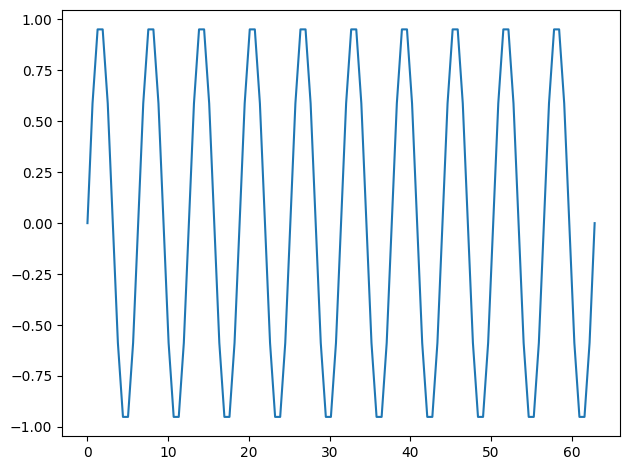

In [ ]:
aqm.analysis_cell()

fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)
aqm.save_fig(fig, name="fit", format="pdf")

aqm.display_cfg_link({"param1": "556", "param2": 1.1123123123123e9})
aqm.parse_config_str("")
fig.show()

In [21]:
print(aqm.d.info.prints)


Some info1
Going out1



In [50]:
format(13.123123, "e")

'1.312312e+01'

In [48]:
f"{13.123123:>E}"

'1.312312E+01'

In [49]:
f"{'asdas':p}"

ValueError: Unknown format code 'p' for object of type 'str'

## Example 2: acquisition with a standalone platform (e.g. Quantum Machine)

In [23]:
aqm.acquisition_cell("sine_qm")

# The code contained in this cell is important as it defines how the data are acquired.


def fetch_new_data():
    """
    This code mimics
    """
    x = np.linspace(0, 20 * np.pi, 101)
    y = np.sin(x)
    return x, y + np.random.random(len(x))


# submit job to the quantum machine if needed

INFO:1:2024_08_01__15_43_26__sine_qm


INFO:2024_08_01__15_43_26__sine_qm


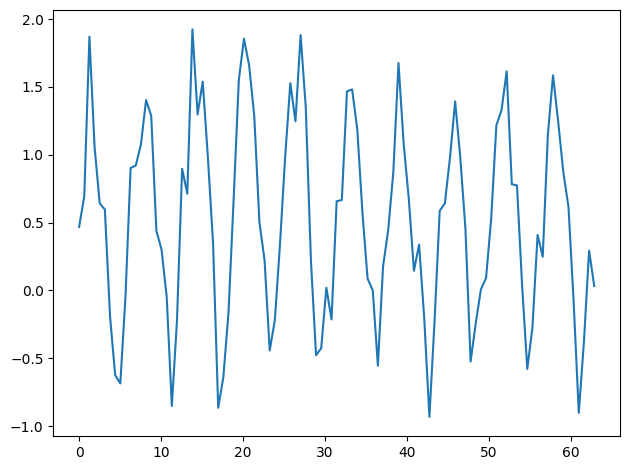

In [29]:
aqm.analysis_cell()

# print(aqm.is_loaded_data)

# This cell might retrieve some data from a standalone acquisition platform (like a quantum machine for instance)
if aqm.current_acquisition is not None:
    x, y = fetch_new_data()
    aqm.save_acquisition(
        x=x, y=y
    )  # doesn't need to be called in the same cell as %%acquisition_cell
    # in fact, the kernel could have been restarted in the meantime (as long as x and y are retrieved somehow)

# Actually, one should
fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)

aqm.display_cfg_link({"param1": "555"})

aqm.save_fig(fig, name="fit")

In [31]:
aqm.display_cfg_link({"param1": "555"})

## Example 3: analysis on reloaded data

INFO:labmate.acquisition_notebook.acquisition_analysis_manager:old_data_example


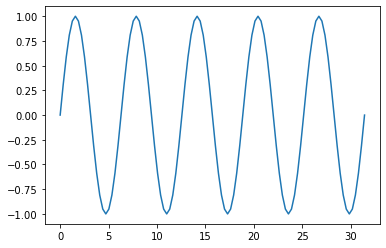

In [14]:
aqm.analysis_cell("../../tests/data/old_data_example")
# The name of the h5 file is sufficient if it is located in the current data_path. Otherwise, a fullpath can be provided.

if aqm.current_acquisition is not None: # when an h5 file is specified above, then data should not be fetched anymore
    x, y = fetch_new_data()
    aqm.save_acquisition(x=x, y=y) # doesn't need to be called in the same cell as %%acquisition_cell
    # in fact, the kernel could have been restarted in the meantime (as long as x and y are retrieved somehow)

fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)
aqm.save_fig(fig); # even with loaded data, the analysis script and figures are overwritten


## Example 3.2: analysis on reloaded data with the saved code

In [16]:
aqm.analysis_cell("../../tests/data/old_data_example2").get_analysis_code()

INFO:labmate.acquisition_notebook.acquisition_analysis_manager:old_data_example2


"aqm.analysis_cell('../../tests/data/old_data_example2')\n\nplt.figure()\nplt.plot(aqm.data.x_loop.x, aqm.data.x_loop.y)\n\naqm.save_fig()\nplt.show()\n# \n# print(aqm.d.z)"

## Example 4: loop

In [18]:
from labmate.acquisition import AcquisitionLoop

In [19]:
aqm.acquisition_cell("sample_loop")

aqm.aq.x_loop = loop = AcquisitionLoop()
for i in loop(1, 10, .5):
    loop(x=i, y=i**2)
    
aqm.save_acquisition();

INFO:labmate.acquisition_notebook.acquisition_analysis_manager:2023_02_19__22_28_52__sample_loop


INFO:labmate.acquisition_notebook.acquisition_analysis_manager:2023_02_19__22_28_52__sample_loop


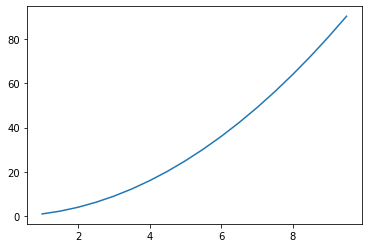

In [20]:
aqm.analysis_cell()

plt.figure()
plt.plot(aqm.data.x_loop.x, aqm.data.x_loop.y)

aqm.save_fig()
plt.show()
# 
# print(aqm.d.z)

## Parse config file

In [40]:
aqm = AcquisitionAnalysisManager("tmp_data/", use_magic=False, save_files=False)
aqm.set_config_file("files/dummy_config1.txt")
aqm.acquisition_cell("test")
aqm.save_acquisition()

INFO:labmate.acquisition_notebook.acquisition_analysis_manager:2023_02_21__00_16_08__test


In [44]:
cfg = aqm.parse_config('dummy_config1')

In [17]:
print(2)

2


In [ ]:
aqm.acquisition_cell("simple_sine")

In [21]:
aqm.acquisition_cell("simple_sine")
from io import StringIO
import sys
from ipykernel.iostream import OutStream

aqm.logger.setLevel("DEBUG")
aqm.logger.debug("Hello")
out_stream: OutStream = sys.stdout
buffer: StringIO = out_stream._buffer

print(1)
print(out_stream._buffer.getvalue())

buffer = aqm.logger.handlers[0]
buffer.stream._buffer.getvalue()

INFO:2024_07_31__19_39_53__simple_sine
DEBUG:Hello


1
1



''

In [22]:
import logging
import io

# Create a StringIO object to capture log messages
log_stream = io.StringIO()

# Create a logger
logger = logging.getLogger("my_logger")
logger.setLevel(logging.DEBUG)

# Create a StreamHandler with the StringIO object
stream_handler = logging.StreamHandler(log_stream)
stream_handler.setLevel(logging.DEBUG)

# Create a formatter and set it for the handler
formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")
stream_handler.setFormatter(formatter)

# Add the handler to the logger
logger.addHandler(stream_handler)


logger.debug("This is a debug message.")
logger.info("This is an info message.")
logger.warning("This is a warning message.")
logger.error("This is an error message.")
logger.critical("This is a critical message.")

DEBUG:This is a debug message.
INFO:This is an info message.
ERROR:This is an error message.
CRITICAL:This is a critical message.
INFO:This is an info message.
ERROR:This is an error message.
CRITICAL:This is a critical message.


In [23]:
# Print the captured log messages
print("Captured Log Messages:")
print(log_stream.getvalue())

Captured Log Messages:
2024-07-31 19:49:15,819 - my_logger - DEBUG - This is a debug message.
2024-07-31 19:49:15,820 - my_logger - INFO - This is an info message.
2024-07-31 19:49:15,820 - my_logger - WARNING - This is a warning message.
2024-07-31 19:49:15,821 - my_logger - ERROR - This is an error message.
2024-07-31 19:49:15,822 - my_logger - CRITICAL - This is a critical message.



In [27]:
log_stream.flush()
log_stream.getvalue()

'2024-07-31 19:49:15,819 - my_logger - DEBUG - This is a debug message.\n2024-07-31 19:49:15,820 - my_logger - INFO - This is an info message.\n2024-07-31 19:49:15,820 - my_logger - WARNING - This is a warning message.\n2024-07-31 19:49:15,821 - my_logger - ERROR - This is an error message.\n2024-07-31 19:49:15,822 - my_logger - CRITICAL - This is a critical message.\n'

In [34]:
log_stream2.close()
log_stream2 = io.StringIO()
print("New instance", log_stream2.getvalue())
stream_handler.setStream(log_stream2)
print("After reset", log_stream2.getvalue())
logger.error("This is an error message.")
print("New val", log_stream2.getvalue())

ERROR:This is an error message.


New instance 
After reset 
New val 2024-07-31 19:52:06,566 - my_logger - ERROR - This is an error message.



In [ ]:
from io import StringIO
import sys
from ipykernel.iostream import OutStream

buffer: StringIO = BufferCatcher()
sys.stdout._buffer = buffer
# out_stream: OutStream = sys.stdout

print(1)
# print(out_stream._buffer.getvalue())

1


In [ ]:
buffer.last_value

'1\n'

In [ ]:
class OutputCatcher:
    def __init__(self):
        self.output = StringIO()

    def write(self, msg):
        self.output.write(msg)

    def flush(self):
        self.output.flush()

    def get_output(self):
        return self.output.getvalue()

    def clear_output(self):
        self.output = StringIO()

In [ ]:
OutStream().fileno

TypeError: OutStream.__init__() missing 3 required positional arguments: 'session', 'pub_thread', and 'name'